In [1]:
import pandas as pd
import numpy as np

import pytz

In [2]:
sf = pd.read_csv("../data/2014-present-sf.csv", header = 2)

In [3]:
sf.head()

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),wind_speed_10m_max (km/h)
0,2014-01-01,1,17.0,6.3,9.9,2014-01-01T15:25,2014-01-02T01:01,0.0,10.5
1,2014-01-02,1,18.4,3.9,10.3,2014-01-02T15:25,2014-01-03T01:02,0.0,10.9
2,2014-01-03,1,18.5,7.1,11.7,2014-01-03T15:25,2014-01-04T01:03,0.0,8.6
3,2014-01-04,1,18.8,4.1,11.1,2014-01-04T15:25,2014-01-05T01:04,0.0,7.5
4,2014-01-05,0,18.5,5.2,10.9,2014-01-05T15:25,2014-01-06T01:04,0.0,13.1


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       3615 non-null   object 
 1   weather_code (wmo code)    3615 non-null   int64  
 2   temperature_2m_max (°C)    3615 non-null   float64
 3   temperature_2m_min (°C)    3615 non-null   float64
 4   temperature_2m_mean (°C)   3615 non-null   float64
 5   sunrise (iso8601)          3615 non-null   object 
 6   sunset (iso8601)           3615 non-null   object 
 7   precipitation_sum (mm)     3615 non-null   float64
 8   wind_speed_10m_max (km/h)  3615 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 254.3+ KB


In [6]:
sf['time'] = pd.to_datetime(sf['time'])
sf.set_index('time', inplace = True)

In [7]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3615 entries, 2014-01-01 to 2023-11-24
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   weather_code (wmo code)    3615 non-null   int64  
 1   temperature_2m_max (°C)    3615 non-null   float64
 2   temperature_2m_min (°C)    3615 non-null   float64
 3   temperature_2m_mean (°C)   3615 non-null   float64
 4   sunrise (iso8601)          3615 non-null   object 
 5   sunset (iso8601)           3615 non-null   object 
 6   precipitation_sum (mm)     3615 non-null   float64
 7   wind_speed_10m_max (km/h)  3615 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 254.2+ KB


In [8]:
type(sf.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [9]:
sf['sunrise (iso8601)'] = pd.to_datetime(sf['sunrise (iso8601)'])
sf['sunset (iso8601)'] = pd.to_datetime(sf['sunset (iso8601)'])

In [10]:
sf['sunrise_mins'] = sf['sunrise (iso8601)'].dt.hour*60 + sf['sunrise (iso8601)'].dt.minute
sf['sunset_mins'] = sf['sunset (iso8601)'].dt.hour*60 + sf['sunset (iso8601)'].dt.minute

<Axes: xlabel='time'>

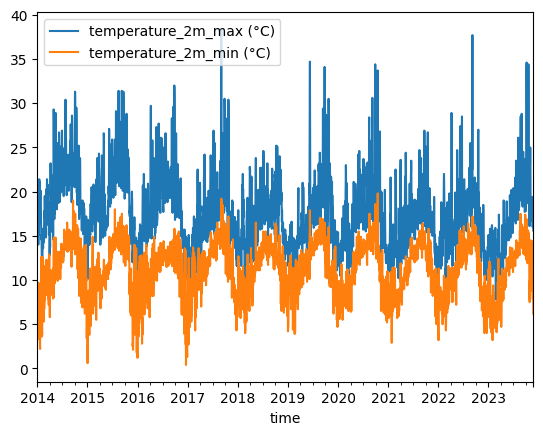

In [11]:
sf[['temperature_2m_max (°C)', 'temperature_2m_min (°C)']].plot()

<Axes: xlabel='time'>

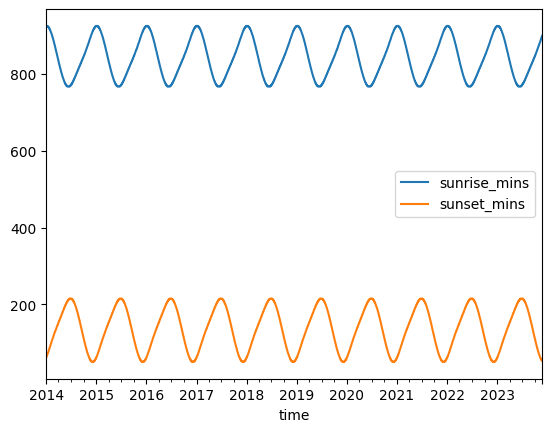

In [12]:
sf[['sunrise_mins', 'sunset_mins']].plot()

<Axes: xlabel='time', ylabel='sunrise_mins'>

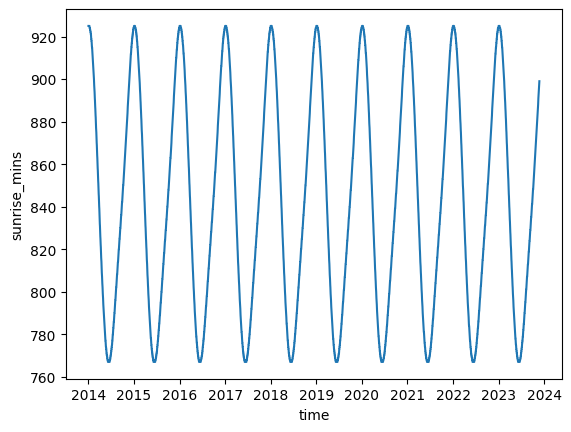

In [13]:
sns.lineplot(x = sf.index, y = sf['sunrise_mins'])

In [76]:
miami = pd.read_csv("../data/2014-present-miami.csv", header = 2)
miami['sunrise (iso8601)'] = pd.to_datetime(miami['sunrise (iso8601)'])
miami['sunset (iso8601)'] = pd.to_datetime(miami['sunset (iso8601)'])

miami.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),wind_speed_10m_max (km/h)
0,2014-01-01,19.8,10.7,15.6,2013-12-31 20:25:00,2014-01-01 06:59:00,0.3,13.8
1,2014-01-02,19.5,7.1,13.1,2014-01-01 20:26:00,2014-01-02 07:00:00,0.0,12.4
2,2014-01-03,19.1,9.9,14.2,2014-01-02 20:26:00,2014-01-03 07:00:00,0.0,10.9
3,2014-01-04,20.6,12.1,15.5,2014-01-03 20:26:00,2014-01-04 07:01:00,4.8,8.0
4,2014-01-05,19.9,9.8,14.9,2014-01-04 20:26:00,2014-01-05 07:02:00,0.0,10.7


In [2]:
gmt = pytz.timezone('GMT+0')
pacific = pytz.timezone('US/Pacific')
eastern = pytz.timezone('US/Eastern')
central = pytz.timezone('US/Central')

sf = pd.read_csv("../data/2014-present-sf.csv", header = 2)
sf['location'] = 'SF'
sf['sunrise (iso8601)'] = pd.to_datetime(sf['sunrise (iso8601)']).dt.tz_localize(gmt).dt.tz_convert(pacific).dt.tz_localize(None)
sf['sunset (iso8601)'] = pd.to_datetime(sf['sunset (iso8601)']).dt.tz_localize(gmt).dt.tz_convert(pacific).dt.tz_localize(None)


ny = pd.read_csv("../data/2014-present-new-york.csv", header = 2)
ny['location'] = 'NY'
ny['sunrise (iso8601)'] = pd.to_datetime(ny['sunrise (iso8601)']).dt.tz_localize(gmt).dt.tz_convert(eastern).dt.tz_localize(None)
ny['sunset (iso8601)'] = pd.to_datetime(ny['sunset (iso8601)']).dt.tz_localize(gmt).dt.tz_convert(eastern).dt.tz_localize(None)


miami = pd.read_csv("../data/2014-present-miami.csv", header = 2)
miami['location'] = 'MIA'
miami['sunrise (iso8601)'] = pd.to_datetime(miami['sunrise (iso8601)'])
miami['sunset (iso8601)'] = pd.to_datetime(miami['sunset (iso8601)'])


austin = pd.read_csv("../data/2014-present-austin.csv", header = 2)
austin['location'] = 'AUS'
austin['sunrise (iso8601)'] = pd.to_datetime(austin['sunrise (iso8601)']).dt.tz_localize(gmt).dt.tz_convert(central).dt.tz_localize(None)
austin['sunset (iso8601)'] = pd.to_datetime(austin['sunset (iso8601)']).dt.tz_localize(gmt).dt.tz_convert(central).dt.tz_localize(None)


chicago = pd.read_csv("../data/2014-present-chicago.csv", header = 2)
chicago['location'] = 'CHI'
chicago['sunrise (iso8601)'] = pd.to_datetime(chicago['sunrise (iso8601)'])
chicago['sunset (iso8601)'] = pd.to_datetime(chicago['sunset (iso8601)'])


df = pd.concat([sf, ny, miami, austin, chicago])

In [36]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18075 entries, 2014-01-01 to 2023-11-24
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   weather_code (wmo code)    10845 non-null  float64       
 1   temperature_2m_max (°C)    18075 non-null  float64       
 2   temperature_2m_min (°C)    18075 non-null  float64       
 3   temperature_2m_mean (°C)   18075 non-null  float64       
 4   sunrise (iso8601)          18075 non-null  datetime64[ns]
 5   sunset (iso8601)           18075 non-null  datetime64[ns]
 6   precipitation_sum (mm)     18075 non-null  float64       
 7   wind_speed_10m_max (km/h)  18075 non-null  float64       
 8   location                   18075 non-null  object        
dtypes: datetime64[ns](2), float64(6), object(1)
memory usage: 1.4+ MB


In [38]:
df[df['location'] == 'MIA'].head()

,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),wind_speed_10m_max (km/h),location
time,,,,,,,,,
2014-01-01,NaN,26.0,23.0,24.1,2014-01-01 07:07:00,2014-01-01 17:41:00,1.0,24.2,MIA
2014-01-02,NaN,27.0,22.4,24.6,2014-01-02 07:07:00,2014-01-02 17:42:00,0.0,21.9,MIA
2014-01-03,NaN,22.4,16.9,19.0,2014-01-03 07:08:00,2014-01-03 17:42:00,0.2,32.0,MIA
2014-01-04,NaN,23.5,19.1,21.6,2014-01-04 07:08:00,2014-01-04 17:43:00,0.8,21.5,MIA
2014-01-05,NaN,25.8,22.8,24.0,2014-01-05 07:08:00,2014-01-05 17:44:00,1.2,26.6,MIA


In [39]:
#df['sunrise (iso8601)'] = pd.to_datetime(df['sunrise (iso8601)'])
#df['sunset (iso8601)'] = pd.to_datetime(df['sunset (iso8601)'])

df['sunrise_mins'] = df['sunrise (iso8601)'].dt.hour*60 + df['sunrise (iso8601)'].dt.minute
df['sunset_mins'] = df['sunset (iso8601)'].dt.hour*60 + df['sunset (iso8601)'].dt.minute

<Axes: xlabel='time', ylabel='sunrise_mins'>

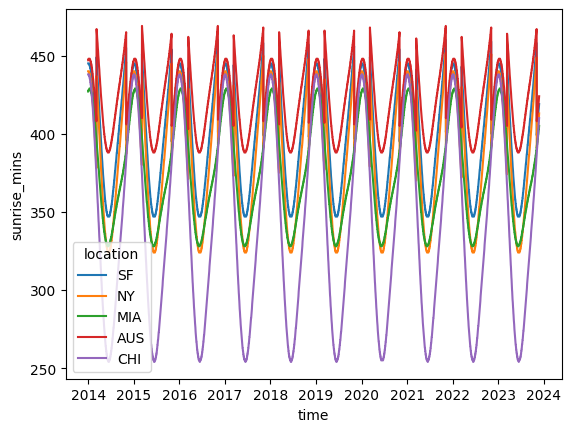

In [40]:
sns.lineplot(
    x = df.index,
    y = df['sunrise_mins'],
    hue = df['location']
)

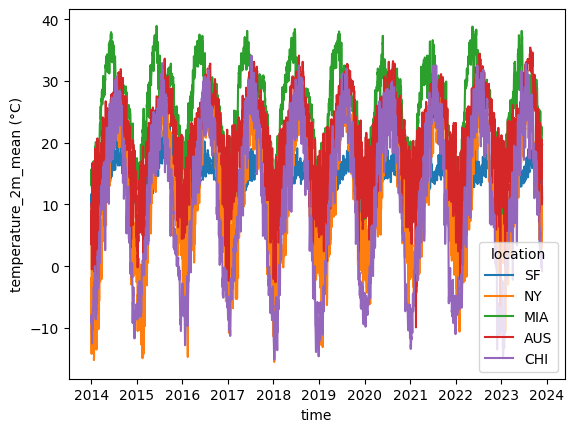

In [18]:
sns.lineplot(
    x = df.index,
    y = df['temperature_2m_mean (°C)'],
    hue = df['location']
);

In [22]:
df.rename(lambda x: x.split()[0],  axis = 1, inplace = True)

In [23]:
df.head()

,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,sunrise,sunset,precipitation_sum,wind_speed_10m_max,location,sunrise_mins,sunset_mins
time,,,,,,,,,,,
2014-01-01,1.0,17.0,6.3,9.9,2014-01-01 15:25:00,2014-01-02 01:01:00,0.0,10.5,SF,925,61
2014-01-02,1.0,18.4,3.9,10.3,2014-01-02 15:25:00,2014-01-03 01:02:00,0.0,10.9,SF,925,62
2014-01-03,1.0,18.5,7.1,11.7,2014-01-03 15:25:00,2014-01-04 01:03:00,0.0,8.6,SF,925,63
2014-01-04,1.0,18.8,4.1,11.1,2014-01-04 15:25:00,2014-01-05 01:04:00,0.0,7.5,SF,925,64
2014-01-05,0.0,18.5,5.2,10.9,2014-01-05 15:25:00,2014-01-06 01:04:00,0.0,13.1,SF,925,64


In [27]:
df.groupby('location')[['precipitation_sum', 'wind_speed_10m_max', 'temperature_2m_mean']].agg(['mean', 'std', 'median'])

precipitation_sum                  wind_speed_10m_max            \
                      mean       std median               mean       std   
location                                                                   
AUS               3.273859  8.793927    0.1          20.376957  6.544464   
CHI               0.253997  1.164937    0.0          17.922656  5.548630   
MIA               2.698257  7.442817    0.0          14.422628  4.940138   
NY                3.446086  8.159195    0.1          20.363458  7.075368   
SF                1.582490  5.714941    0.0          25.996985  8.332051   

                temperature_2m_mean                    
         median                mean        std median  
location                                               
AUS        19.9           20.848520   7.862470   22.0  
CHI        17.4           11.222102  12.623838   12.6  
MIA        13.5           25.891369   6.503924   27.6  
NY         19.2           12.294108   9.583066   12.6  
SF         26.3           13.790678   3.034151   13.8

In [28]:
import pytz

In [32]:
pytz.timezone("GMT+0")

<StaticTzInfo 'GMT+0'>

In [33]:
pytz.timezone("US/Central")

<DstTzInfo 'US/Central' LMT-1 day, 18:09:00 STD>

In [42]:
gmt = pytz.timezone('GMT+0')
pacific = pytz.timezone('US/Pacific')

In [43]:
pacific

<DstTzInfo 'US/Pacific' LMT-1 day, 16:07:00 STD>

In [46]:
df[df['location'] == 'SF']['sunrise'].dt.tz_localize(gmt).dt.tz_convert(pacific)

time
2014-01-01   2014-01-01 07:25:00-08:00
2014-01-02   2014-01-02 07:25:00-08:00
2014-01-03   2014-01-03 07:25:00-08:00
2014-01-04   2014-01-04 07:25:00-08:00
2014-01-05   2014-01-05 07:25:00-08:00
                        ...           
2023-11-20   2023-11-20 06:55:00-08:00
2023-11-21   2023-11-21 06:56:00-08:00
2023-11-22   2023-11-22 06:57:00-08:00
2023-11-23   2023-11-23 06:58:00-08:00
2023-11-24   2023-11-24 06:59:00-08:00
Name: sunrise, Length: 3615, dtype: datetime64[ns, US/Pacific]

In [29]:
import prophet

Importing plotly failed. Interactive plots will not work.


In [6]:
df.head()

,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),wind_speed_10m_max (km/h),location
time,,,,,,,,,
2014-01-01,1.0,17.0,6.3,9.9,2014-01-01 07:25:00,2014-01-01 17:01:00,0.0,10.5,SF
2014-01-02,1.0,18.4,3.9,10.3,2014-01-02 07:25:00,2014-01-02 17:02:00,0.0,10.9,SF
2014-01-03,1.0,18.5,7.1,11.7,2014-01-03 07:25:00,2014-01-03 17:03:00,0.0,8.6,SF
2014-01-04,1.0,18.8,4.1,11.1,2014-01-04 07:25:00,2014-01-04 17:04:00,0.0,7.5,SF
2014-01-05,0.0,18.5,5.2,10.9,2014-01-05 07:25:00,2014-01-05 17:04:00,0.0,13.1,SF


In [16]:
X = sf[['time', 'temperature_2m_mean (°C)']]

In [18]:
X.columns = ['ds', 'y']

In [19]:
delphi = prophet.Prophet()

delphi.fit(X)

18:20:36 - cmdstanpy - INFO - Chain [1] start processing
18:20:36 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = delphi.make_future_dataframe(periods = 365)

In [30]:
forecast = delphi.predict(future)

In [31]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3975,2024-11-19,12.825665,9.329542,13.668950,12.733455,12.917786,-1.330767,-1.330767,-1.330767,-0.010164,-0.010164,-0.010164,-1.320604,-1.320604,-1.320604,0.0,0.0,0.0,11.494898
3976,2024-11-20,12.825356,9.259582,13.729145,12.732843,12.917812,-1.408357,-1.408357,-1.408357,-0.007855,-0.007855,-0.007855,-1.400502,-1.400502,-1.400502,0.0,0.0,0.0,11.416999
3977,2024-11-21,12.825047,9.244203,13.512499,12.732252,12.917837,-1.423540,-1.423540,-1.423540,0.050185,0.050185,0.050185,-1.473725,-1.473725,-1.473725,0.0,0.0,0.0,11.401507
3978,2024-11-22,12.824738,9.198528,13.459589,12.731662,12.917863,-1.556551,-1.556551,-1.556551,-0.015549,-0.015549,-0.015549,-1.541002,-1.541002,-1.541002,0.0,0.0,0.0,11.268187
3979,2024-11-23,12.824428,9.033200,13.511743,12.731071,12.918024,-1.606391,-1.606391,-1.606391,-0.003195,-0.003195,-0.003195,-1.603196,-1.603196,-1.603196,0.0,0.0,0.0,11.218037


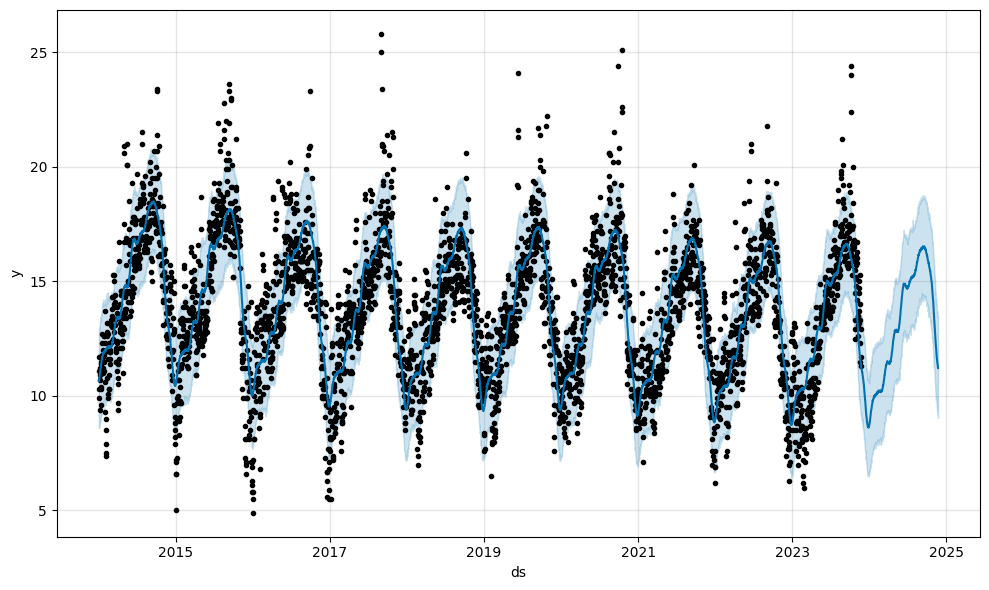

In [32]:
delphi.plot(forecast);

In [33]:
miami = pd.read_csv("../data/2014-present-miami.csv", header = 2)

In [3]:
df = pd.concat([sf, ny, miami, austin, chicago])
X = df[['time', 'temperature_2m_mean (°C)', 'location']]

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

In [13]:
ct = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(),  ['location'])
    ],
    remainder = 'passthrough'
)

ct.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(), ['location'])])

In [26]:
Z = pd.DataFrame(ct.transform(X), columns = ct.named_transformers_['ohe'].get_feature_names_out().tolist() + ['ds', 'y']) 

In [27]:
Z.head()

,location_AUS,location_CHI,location_MIA,location_NY,location_SF,ds,y
0,0.0,0.0,0.0,0.0,1.0,2014-01-01,9.9
1,0.0,0.0,0.0,0.0,1.0,2014-01-02,10.3
2,0.0,0.0,0.0,0.0,1.0,2014-01-03,11.7
3,0.0,0.0,0.0,0.0,1.0,2014-01-04,11.1
4,0.0,0.0,0.0,0.0,1.0,2014-01-05,10.9


In [51]:
nostradomus = prophet.Prophet()

In [52]:
for loc in ct.named_transformers_['ohe'].get_feature_names_out():
    nostradomus.add_regressor(name = loc)

In [53]:
nostradomus.fit(Z)

12:06:12 - cmdstanpy - INFO - Chain [1] start processing
12:06:13 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
forecasts = []
for loc in ct.named_transformers_['ohe'].get_feature_names_out():
    future = nostradomus.make_future_dataframe(periods = 365)
    future[loc] = 1
    for loc2 in ct.named_transformers_['ohe'].get_feature_names_out():
        if loc2 != loc:
            future[loc2] = 0
    forecasts.append(nostradomus.predict(future))


#forecast = nostradomus.predict(pd.concat(futures))

#nostradomus.plot(forecast);

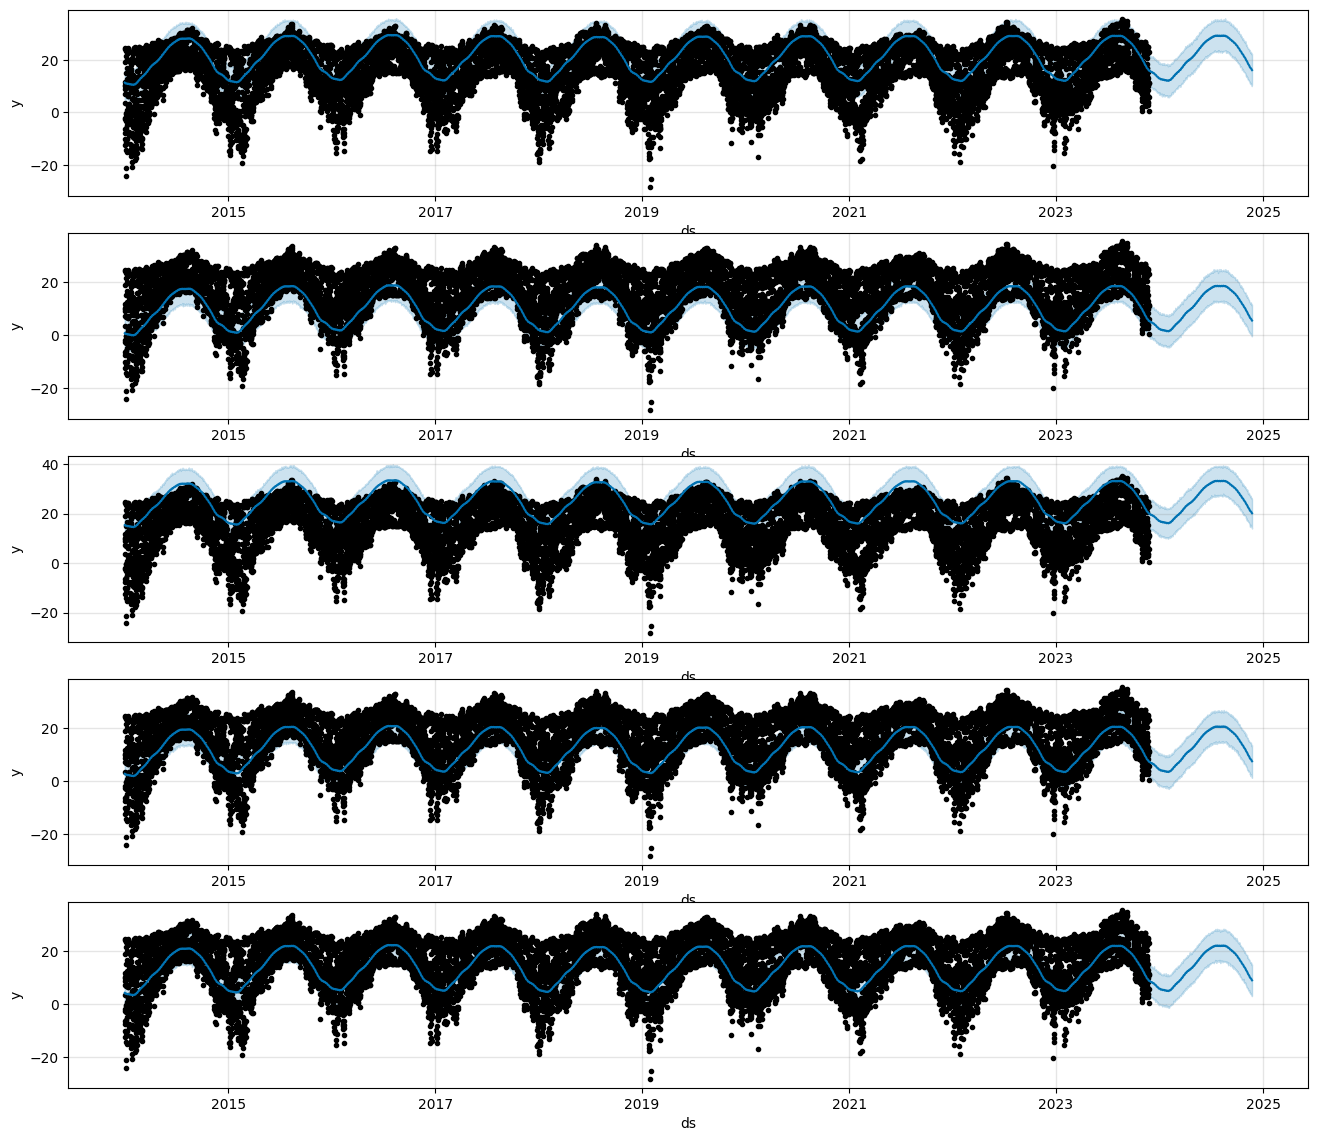

In [55]:
fig, axs = plt.subplots(5, figsize = (16, 14))

for ax, forecast in zip(axs, forecasts):
    nostradomus.plot(forecast, ax = ax)

12:15:39 - cmdstanpy - INFO - Chain [1] start processing
12:15:39 - cmdstanpy - INFO - Chain [1] done processing
12:15:40 - cmdstanpy - INFO - Chain [1] start processing
12:15:40 - cmdstanpy - INFO - Chain [1] done processing
12:15:40 - cmdstanpy - INFO - Chain [1] start processing
12:15:41 - cmdstanpy - INFO - Chain [1] done processing
12:15:41 - cmdstanpy - INFO - Chain [1] start processing
12:15:41 - cmdstanpy - INFO - Chain [1] done processing
12:15:42 - cmdstanpy - INFO - Chain [1] start processing
12:15:42 - cmdstanpy - INFO - Chain [1] done processing


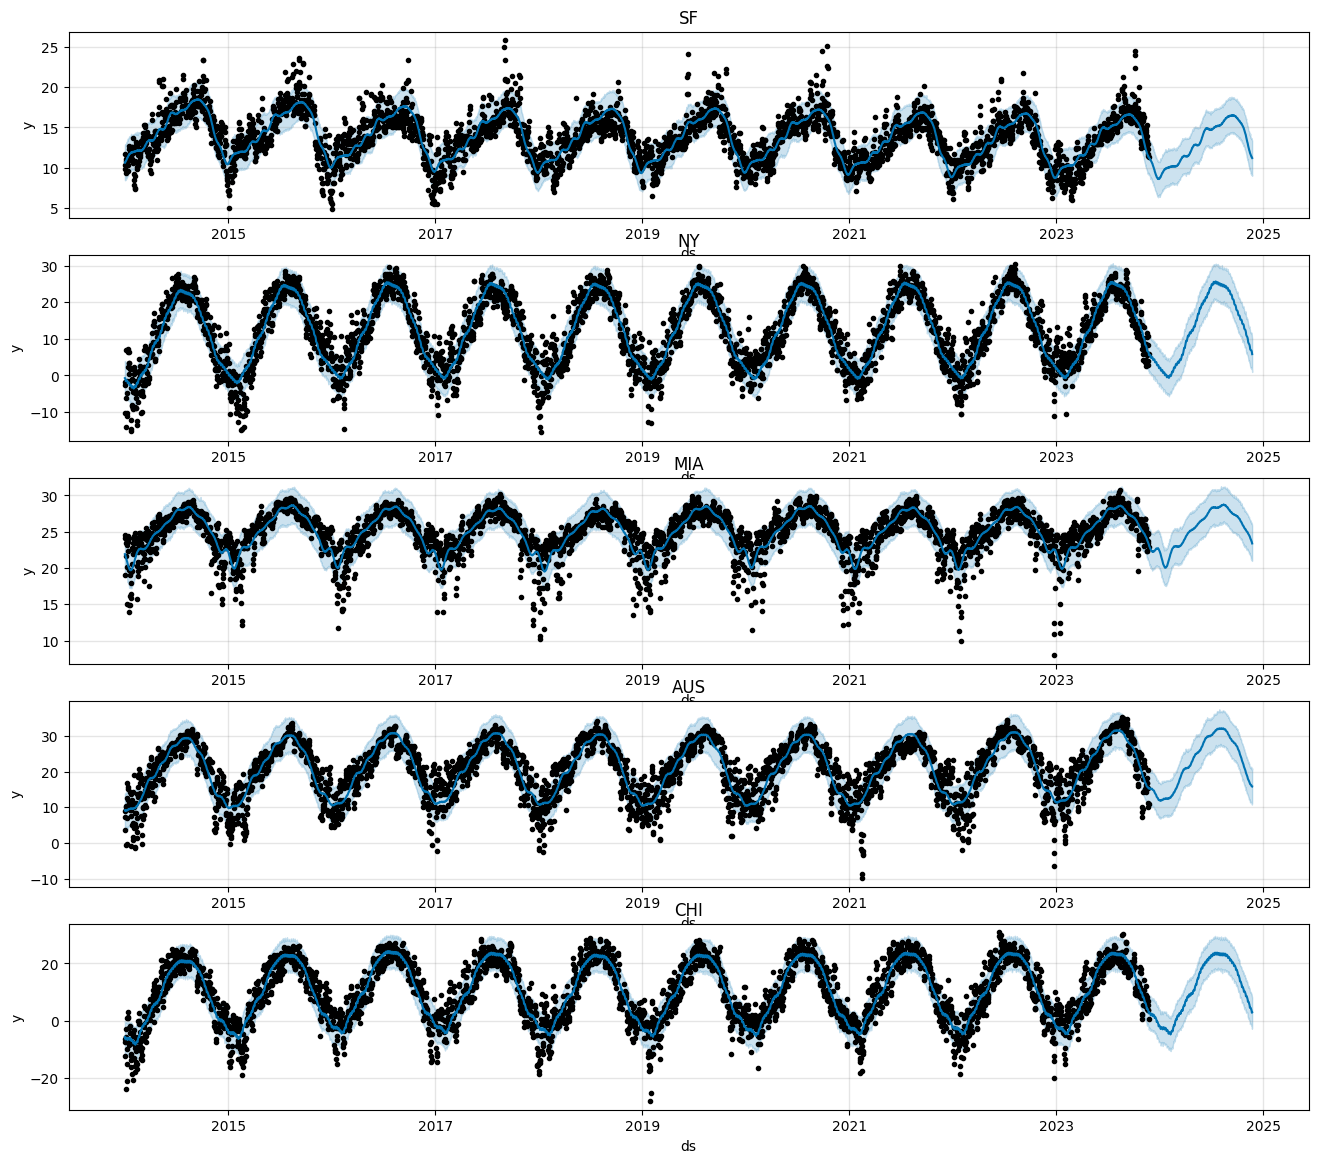

In [64]:
fig, axs = plt.subplots(5, figsize = (16, 14))

for ax, loc in zip(axs, X['location'].unique()):
    data = X[X['location'] == loc]
    data.columns = ['ds', 'y', 'location']
    oracle = prophet.Prophet().fit(data[['ds', 'y']])
    future = oracle.make_future_dataframe(periods = 365)
    forecast = oracle.predict(future)

    oracle.plot(forecast, ax = ax)
    ax.set_title(loc)